In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Problem Statement 10: (Fix the header)

In [8]:
hospital_data = pd.read_csv('Data/hospitals.csv')
metadata = pd.read_csv('Data/metadata.csv')
hospital_data.head(5)

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [9]:
metadata

,Acronyms
0,"Number of Primary Health Centers(PHCs),"
1,"Community Health Centers(CHCs),"
2,Sub-District/Divisional Hospitals(SDHs)
3,District Hospitals(DHs)


In [10]:
hospital_data.columns = ['State/UT', 'Number of Primary Health Centers(PHCs),', 'Community Health Centers(CHCs),', 'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs)', 'Hospitals', 'HospitalBeds']
hospital_data.head(5)

,State/UT,"Number of Primary Health Centers(PHCs),","Community Health Centers(CHCs),",Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


## Problem Statement 11: (Create a function to alter the data to create uniformity)

In [11]:
def clean_state_names(name):

    name = name.title().replace('&', 'and')
    
    words = name.split()
    camel_case = []
    for word in words:
        if word.lower() == 'and':
            camel_case.append('and')
        else:
            camel_case.append(word.capitalize())

    return ' '.join(camel_case)

hospital_data['State/UT'] = hospital_data['State/UT'].apply(clean_state_names)
hospital_data.head(5)

,State/UT,"Number of Primary Health Centers(PHCs),","Community Health Centers(CHCs),",Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [12]:
hospital_data.to_csv("Clean Data/all_hospitals.csv", index=False)
census_data = pd.read_csv('Clean Data/census.csv')

## Problem Statement 12: (Analyze Healthcare facility disparity)

In [13]:
merged_data = hospital_data.merge(census_data, on='State/UT')
merged_data

,State/UT,"Number of Primary Health Centers(PHCs),","Community Health Centers(CHCs),",Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,District Name,Population,Male,...,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,Nicobars,36842.0,20727.0,...,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
1,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,North AND Middle Andaman,105597.0,54861.0,...,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0
2,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,South Andaman,238142.0,127283.0,...,190266.0,105794.0,84472.0,34901.0,50631.0,85532.0,128402.0,76332.0,33128.0,280.0
3,Andhra Pradesh,1417,198,31,20,1666,60799,Srikakulam,2703114.0,1341738.0,...,1495381.0,857824.0,637557.0,752752.0,149684.0,902436.0,1423119.0,747385.0,528736.0,3874.0
4,Andhra Pradesh,1417,198,31,20,1666,60799,Vizianagaram,2344474.0,1161477.0,...,1238388.0,707503.0,530885.0,592458.0,157056.0,749514.0,1206366.0,666394.0,451469.0,20245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,West Bengal,1374,406,70,55,1905,51163,Haora,4850029.0,2500819.0,...,3605206.0,1942824.0,1662382.0,483384.0,869313.0,1352697.0,2587164.0,1423304.0,833104.0,6457.0
591,West Bengal,1374,406,70,55,1905,51163,Kolkata,4496694.0,2356766.0,...,3588137.0,1926915.0,1661222.0,0.0,1308106.0,1308106.0,2025389.0,1433314.0,1014769.0,23222.0
592,West Bengal,1374,406,70,55,1905,51163,South Twenty Four Parganas,8161961.0,4173778.0,...,5531657.0,3043277.0,2488380.0,1568802.0,611430.0,2180232.0,4763943.0,2151474.0,1235558.0,10986.0
593,West Bengal,1374,406,70,55,1905,51163,Paschim Medinipur,5913457.0,3007885.0,...,4078412.0,2266913.0,1811499.0,1364335.0,201048.0,1565383.0,3243971.0,1664250.0,990179.0,15057.0


In [14]:
merged_data = merged_data.dropna(subset=['HospitalBeds', 'Population'])
merged_data = merged_data.fillna(0)

In [15]:
total_beds = merged_data['HospitalBeds'].astype(int)
population = merged_data['Population'].astype(int)

In [16]:
beds_per_10000 = (total_beds / population) * 10000
beds_per_10000

0      338.200966
1      117.995776
2       52.321724
3      224.922071
4      259.328958
          ...    
590    105.490091
591    113.779145
592     62.684691
593     86.519611
594    100.400814
Length: 594, dtype: float64

In [17]:
national_avg = beds_per_10000.sum() / len(beds_per_10000)
national_avg

237.69232176900633

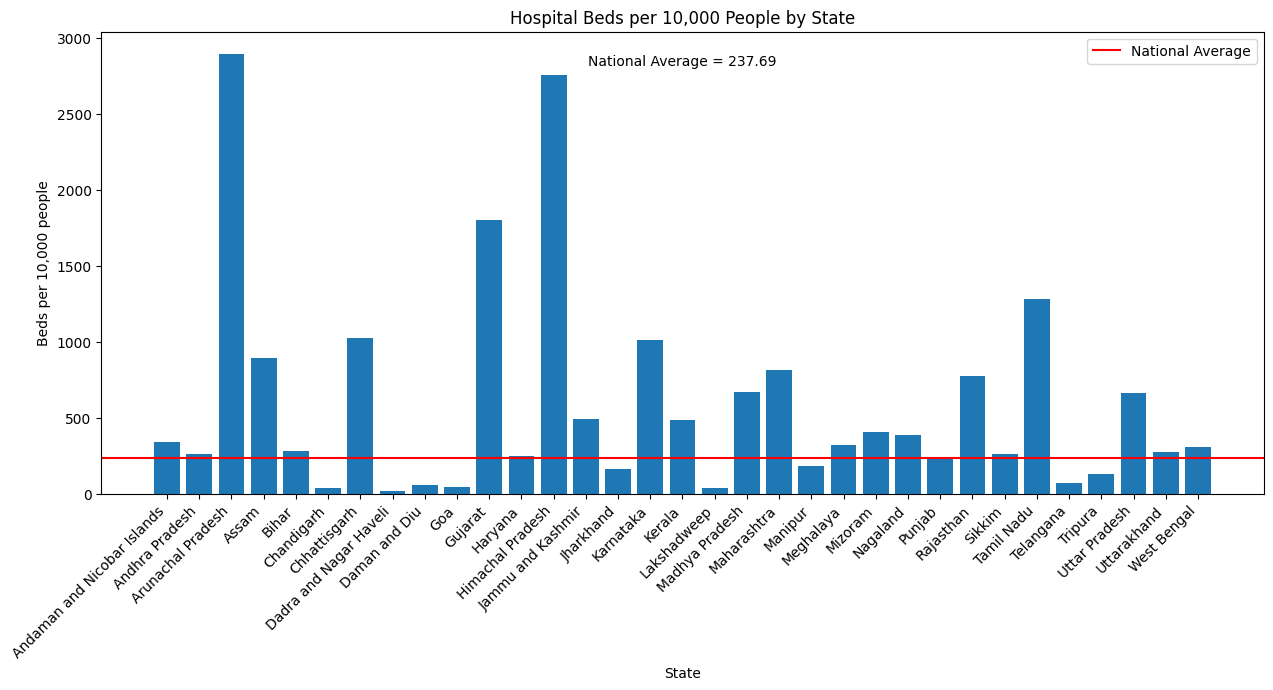

In [18]:
plt.figure(figsize=(15,6))
plt.bar(merged_data['State/UT'], beds_per_10000)
plt.axhline(y=national_avg, color='r', linestyle='-')
plt.xlabel('State')
plt.ylabel('Beds per 10,000 people') 
plt.title('Hospital Beds per 10,000 People by State')
plt.legend(['National Average'])
plt.xticks(rotation=45, ha="right")
plt.annotate(f'National Average = {national_avg:.2f}', xy=(0.5, 0.95),  
             xycoords='axes fraction', horizontalalignment='center', 
             verticalalignment='top')

plt.show()

In [19]:
merged_data['HospitalBeds'] = pd.to_numeric(merged_data['HospitalBeds'], errors='coerce')
merged_data['Population'] = pd.to_numeric(merged_data['Population'], errors='coerce')

In [20]:
merged_data['Beds_per_10000'] = merged_data['HospitalBeds'] / (merged_data['Population'] / 10000)
lowest_states = merged_data.nsmallest(3, 'Beds_per_10000')
print("Three States/UTs with the least amount of beds for their population:")
print(lowest_states[['State/UT', 'Beds_per_10000']])

Three States/UTs with the least amount of beds for their population:
                   State/UT  Beds_per_10000
118           Daman and Diu       15.587975
116  Dadra and Nagar Haveli       16.525607
218               Jharkhand       25.406168
